<a href="https://colab.research.google.com/github/navaneet-03/FA_Project/blob/main/FA_pomegranate_fruitsResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pomegranate project**
Using fruits

First we're importing all the utilities and functions to work with the dataset


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import cv2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Now we'll import the tensforflow utilities to build our cnn architecture

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

Now we shall import the dataset stored on google drive

In [ ]:
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive


Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
classes_map={'Bacterial' : 1, 'Fungal' : 2, 'Healthy' : 0}

In [ ]:
dir = "Pomegranate/Fruits/"


In [ ]:
tl = os.listdir(dir)
tl

['Bacterial', 'Healthy', 'Fungal']

In [ ]:
from google.colab.patches import cv2_imshow

Now, we shall work with the dataset and perform some image processing

In [ ]:
def get_data():
  images = []
  labels = []
  train_list = os.listdir(dir)
  print(train_list)
  for i in train_list:
    flag = 1
    for image in os.listdir(dir+ "/" + i):
      img=cv2.imread(dir + i + '/' + image)
      # img=cv2.resize(img, (256,256))
      img=cv2.resize(img, (224,224))
      if flag:
        print()
        print(i)
        cv2_imshow(img)
        flag = 0
      images.append(img)
      labels.append(classes_map[i])

  return images, labels

['Bacterial', 'Healthy', 'Fungal']

Bacterial


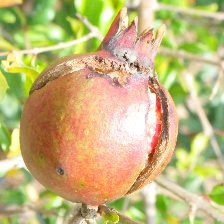


Healthy


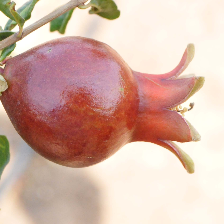


Fungal


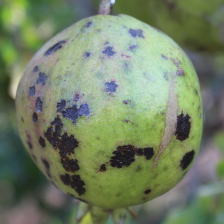

In [ ]:
X, Y = get_data()


In [ ]:
np_x=np.array(X)
label_encoded_y=to_categorical(Y)
# label_encoded_y

splitting the dataset to train validation and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_x, label_encoded_y, test_size = 0.3, random_state=3)

classes=3
batch=32
epochs=40
learning_rate=0.001

## Building the CNN model

In [ ]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# predictions = Dense(3, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model = Sequential()
model.add(ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False, pooling='avg'))
model.add(Dense(3, activation='softmax'))
model.layers[0].trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/40
8/8 [==============================] - 15s 483ms/step - loss: 1.2652 - accuracy: 0.4188 - val_loss: 0.7327 - val_accuracy: 0.6610
Epoch 2/40
8/8 [==============================] - 1s 133ms/step - loss: 0.6377 - accuracy: 0.7009 - val_loss: 0.4358 - val_accuracy: 0.8305
Epoch 3/40
8/8 [==============================] - 1s 107ms/step - loss: 0.4164 - accuracy: 0.8120 - val_loss: 0.3184 - val_accuracy: 0.8475
Epoch 4/40
8/8 [==============================] - 1s 108ms/step - loss: 0.3025 - accuracy: 0.8889 - val_loss: 0.2403 - val_accuracy: 0.9322
Epoch 5/40
8/8 [==============================] - 1s 128ms/step - loss: 0.2275 - accuracy: 0.9316 - val_loss: 0.2058 - val_accuracy: 0.9492
Epoch 6/40
8/8 [==============================] - 1s 107ms/step - loss: 0.1831 - accuracy: 0.9701 - val_loss: 0.1862 - val_accuracy: 0.9492
Epoch 7/40
8/8 [==============================] - 1s 128ms/step - loss: 0.1537 - accuracy: 0.9701 - val_loss: 0.1711 - val_accuracy: 0.9492
Epoch 8/40
8/8 [===

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

4/4 [==============================] - 1s 415ms/step - loss: 0.1082 - accuracy: 0.9683
Test accuracy: 0.9682539701461792
Test loss: 0.10824331641197205


In [ ]:
y_pred_ = model.predict(x_test)
y_pred = []
#print(y_pred_)
for i in y_pred_:
  m = 0
  for x in range(len(i)):
    temp = [0,0,0]
    if i[x] > i[m]:
      m = x
    temp[m] = 1
  y_pred.append(temp)
# y_test

4/4 [==============================] - 2s 108ms/step


In [ ]:
from sklearn.metrics import classification_report
print("Test Data\n", classification_report(y_test, y_pred, target_names = ['Healthy', 'Bacterial', 'Fungal']))

Test Data
               precision    recall  f1-score   support

     Healthy       1.00      0.96      0.98        28
   Bacterial       0.96      0.96      0.96        48
      Fungal       0.96      0.98      0.97        50

   micro avg       0.97      0.97      0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126
 samples avg       0.97      0.97      0.97       126



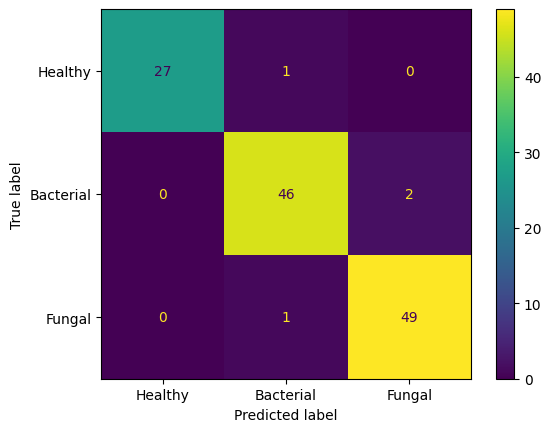

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_t = [np.argmax(i) for i in y_test]
y_p = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_t, y_p)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy', 'Bacterial', 'Fungal'])
cm_display.plot()
plt.show()

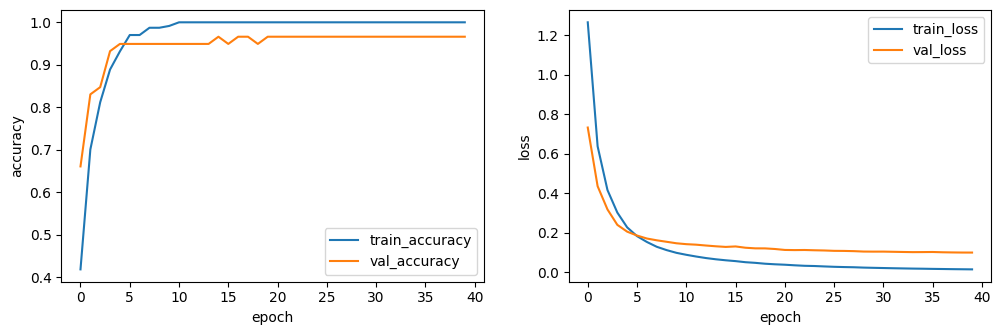

In [ ]:
def plot_results(model):

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()



plot_results(model)